# ドル指数 週足 メジアン統計

In [1]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [2]:
code = 'DX-Y.NYB'
symbol = code
ticker = yf.Ticker(symbol)

In [3]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='10y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-24 00:00:00-04:00,111.879997,112.529999,109.540001,110.669998,0,0.0,0.0
2022-10-31 00:00:00-04:00,110.669998,113.150002,110.430000,110.879997,0,0.0,0.0
2022-11-07 00:00:00-05:00,110.790001,111.269997,106.279999,106.290001,0,0.0,0.0
2022-11-14 00:00:00-05:00,106.480003,107.269997,105.339996,106.930000,0,0.0,0.0
2022-11-21 00:00:00-05:00,106.970001,107.989998,105.629997,105.959999,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-22 00:00:00-04:00,97.650002,98.610001,97.199997,98.150002,0,0.0,0.0
2025-09-29 00:00:00-04:00,98.169998,98.180000,97.459999,97.720001,0,0.0,0.0
2025-10-06 00:00:00-04:00,97.959999,99.559998,97.959999,98.980003,0,0.0,0.0


In [4]:
dt = df.tail(1).index[0]
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'1020'

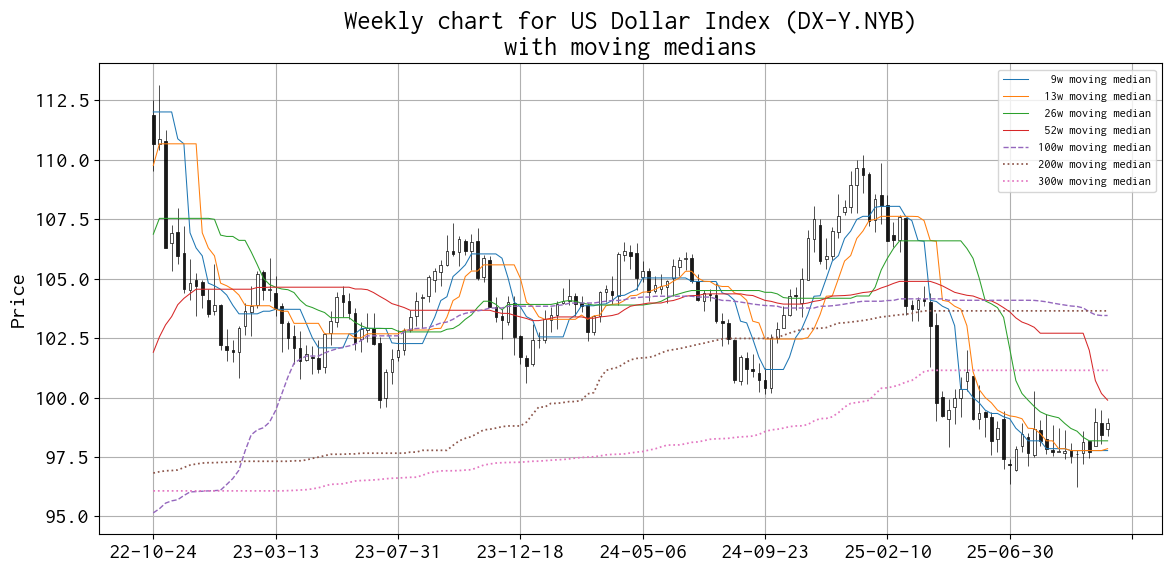

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()
mm300 = df0['Close'].rolling(300).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label='  9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=' 13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=' 26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=' 52w moving median', ax=ax),
    mpf.make_addplot(mm100[df.index], width=1, linestyle='dashed', label='100w moving median', ax=ax),
    mpf.make_addplot(mm200[df.index], width=1.25, linestyle='dotted', label='200w moving median', ax=ax),
    mpf.make_addplot(mm300[df.index], width=1.25, linestyle='dotted', label='300w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nwith moving medians' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig(f"{date_str}_report_weekly_chart_robust_{code}.png")
plt.show()

In [6]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-20 00:00:00-04:00,98.669998,99.139999,98.389999,98.938004,0,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-10-13 00:00:00-04:00    98.430000
2025-10-20 00:00:00-04:00    98.938004
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-10-13 00:00:00-04:00         NaN
2025-10-20 00:00:00-04:00    0.508003
Name: Close, dtype: float64

## Robust Bollinger bands

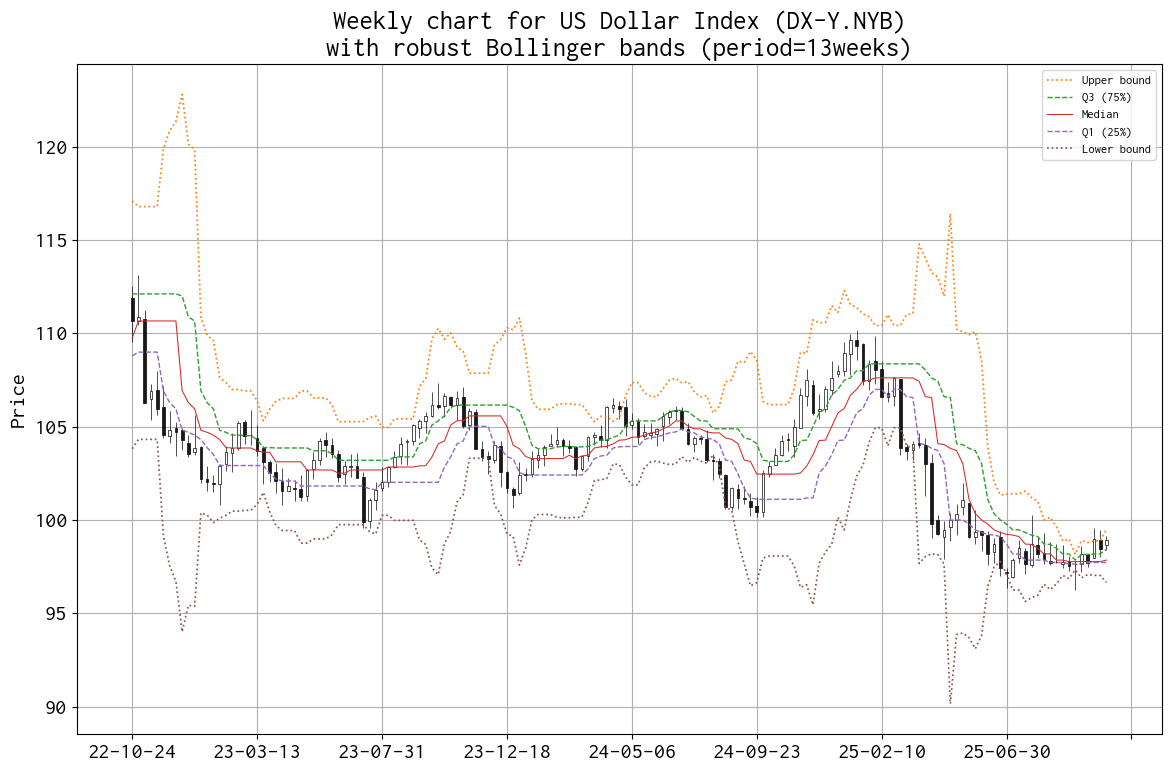

In [9]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 13
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig(f"{date_str}_report_weekly_chart_bollinger_robust_{code}.png")
plt.show()

## ヒストグラム

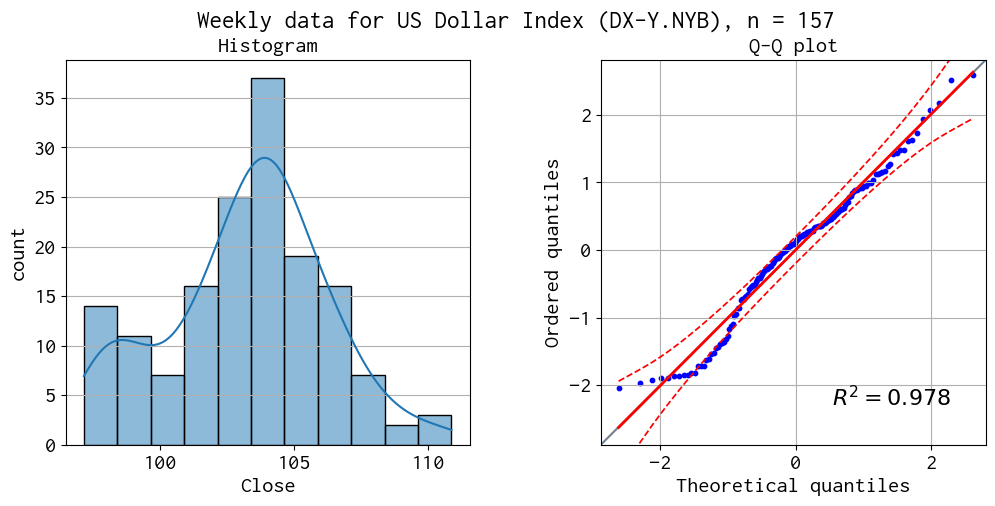

In [10]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{date_str}_report_weekly_histogram_qqplot_{code}.png")
plt.show()